# CS331 - Lab Assignment 3
# Group ID = AyKaGaRo
# Question 6
(Auto labeling with EM) In practice, availability of labelled datasets is difficult. One approach is to cluster
the dataset suitably and then retrospectively assign label to each cluster. Using the approach described in
Figure 9.10 of Bishop cluster the MNIST dataset into 10 clusters using mixture of bernoulli distributions
and then examine the average cluster. Thereafter, each cluster is labelled based on the average cluster.
Record, how many points were misclassified based on this approach.

In [239]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from scipy.io import loadmat
from scipy.stats import multivariate_normal as mvn

In [240]:
# Load digits dataset
digits = load_digits()

# Create a DataFrame from the digits data
df = pd.DataFrame(digits.data)

# Add a column for the target values
df['target'] = digits.target

# Print the DataFrame
print("Digits dataset:")
print("---------------")
# print(df)
df



Digits dataset:
---------------


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [241]:
# Binarize the data except the target column
columns_to_binarize = df.columns[:-1]
df[columns_to_binarize] = (df[columns_to_binarize] > 0.5).astype(int)

# Print the modified DataFrame
df


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,2
3,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,3
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,1,0,0,9
1793,0,0,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
1794,0,0,1,1,1,1,0,0,0,0,...,0,0,0,1,1,1,1,0,0,8
1795,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,9


In [242]:
# Extract all features by dropping the 'target' column
x = df.drop('target', axis=1)
# Print the features DataFrame
print("All features (x):")
print("-----------------")
x


All features (x):
-----------------


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,0,0,0,1,1,1,0,0,0,0,...,1,0,0,0,0,1,1,1,1,0
3,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,1,1,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,1,1,1,1,0,0,0,1,...,1,0,0,0,1,1,1,1,0,0
1793,0,0,1,1,1,1,1,0,0,0,...,1,0,0,0,1,1,1,1,0,0
1794,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,1,1,1,1,0,0
1795,0,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,1,1,1,0,0


In [243]:
# Extract the target column from the DataFrame
y = df['target']

# Print the target column
print("Target column (y):")
print("-------------------")
print(y)


Target column (y):
-------------------
0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64


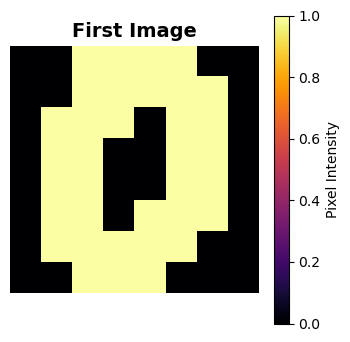

In [244]:
# Display the first image with a custom colormap and styling
plt.figure(figsize=(4, 4))
plt.imshow(x.iloc[0].values.reshape(8, 8), cmap='inferno', interpolation='nearest')
plt.title('First Image', fontsize=14, fontweight='bold')
plt.axis('off')
plt.colorbar(label='Pixel Intensity')
plt.show()


In [245]:
def initialize_parameters(data, K):
    # Convert images to binary
    binary_threshold = 0.5  # Adjust this threshold value as needed
    binary_images = np.where(data > binary_threshold, 1, 0)

    # Reshape the data
    training_data = binary_images.reshape(binary_images.shape[0], (binary_images.shape[1]*binary_images.shape[2]))
    D = training_data.shape[1]

    # Generate initial values for mu and pi
    MU = np.random.uniform(low=0.15, high=0.85, size=(K, D))
    PI = np.ones(K) / K
    
    return training_data, D, MU, PI

In [246]:
def expectation_step(X, mu, pi):
    """
    Perform the E-step of the EM algorithm.

    Parameters:
    X (numpy.ndarray): Input data.
    mu (numpy.ndarray): Current means.
    pi (numpy.ndarray): Current proportions.

    Returns:
    numpy.ndarray: Calculated gamma.
    """
    # Set a small value for numerical stability
    epsilon = 1e-6

    # Calculate the exponent term for the positive outcomes
    positive_exponent = X @ np.log(mu.T + epsilon)

    # Calculate the exponent term for the negative outcomes
    negative_exponent = (1 - X) @ np.log(1 - mu.T + epsilon)

    # Combine the exponent terms and proportions
    log_terms = np.log(pi + epsilon) + positive_exponent + negative_exponent

    # Exponentiate the combined terms to get gamma
    gamma = np.exp(log_terms)

    # Normalize gamma
    gamma /= gamma.sum(axis=1)[:, np.newaxis]

    return gamma


In [247]:
def maximization_step(gamma, X):
    """
    Perform the M-step of the EM algorithm.

    Parameters:
    gamma (numpy.ndarray): Gamma values from the E-step.
    X (numpy.ndarray): Input data.

    Returns:
    tuple: Tuple containing the following:
        - PI (numpy.ndarray): Updated proportions.
        - MU (numpy.ndarray): Updated means.
    """
    # Calculate the sum of gamma for each cluster
    Nm = gamma.sum(axis=0)

    # Update proportions (PI)
    PI = Nm / len(X)

    # Update means (MU)
    MU = gamma.T @ X / Nm[:, np.newaxis]

    return PI, MU


In [248]:
def EM_algorithm(X, K, epochs):
    """
    Perform the Expectation-Maximization (EM) algorithm.

    Parameters:
    X (numpy.ndarray): Input data.
    K (int): Number of clusters.
    epochs (int): Maximum number of iterations.

    Returns:
    tuple: Tuple containing the following:
        - MU (numpy.ndarray): Final means.
        - PI (numpy.ndarray): Final proportions.
    """
    # Initialize parameters
    training_data, num_features, MU, PI = initialize_parameters(X, K)
    
    # Set a threshold for convergence
    threshold = 1e-4
    
    # Iterate through epochs
    for i in range(epochs):
        # Copy current values for comparison
        temp_mu = MU.copy()
        temp_pi = PI.copy()

        # E-step
        gamma = expectation_step(training_data, MU, PI)
        
        # M-step
        PI, MU = maximization_step(gamma, training_data)

        # Calculate changes in parameters
        delta_mu = np.linalg.norm(MU - temp_mu)
        delta_pi = np.linalg.norm(PI - temp_pi)

        # Check for convergence
        if delta_mu < threshold and delta_pi < threshold:
            print('EM algorithm converged at {}\'th iteration'.format(i))
            break
    else:
        print("Reached maximum iterations for EM algorithm\n")
    
    return MU, PI


In [249]:
def train_model(data, K, epochs):
    """
    Train the model using the Expectation-Maximization (EM) algorithm and plot the clusters.

    Parameters:
    data (numpy.ndarray): Input data.
    K (int): Number of clusters.
    epochs (int): Maximum number of iterations for the EM algorithm.

    Returns:
    tuple: Tuple containing the following:
        - MU (numpy.ndarray): Final means.
        - PI (numpy.ndarray): Final proportions.
    """
    # Run EM algorithm to obtain final means (MU) and proportions (PI)
    MU, PI = EM_algorithm(data, K, epochs)
    
    # Plot clusters
    fig, sp = plt.subplots(nrows=1, ncols=K, figsize=(20, 20), dpi=100)
    
    for i in range(K):
        sp[i].imshow(MU[i].reshape(8, 8), cmap='gray')
        sp[i].set_title('Cluster {}\n pi = {:0.3f}'.format(i, PI[i]), fontsize=K**(-1)//0.02)
        sp[i].axis('off')
    
    plt.show()
    
    return MU, PI


EM algorithm converged at 93'th iteration


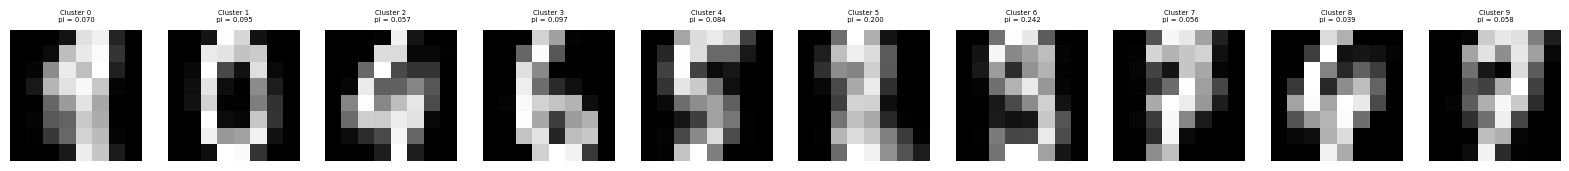

Number of mismatched points:  212
Accuracy:  28.37837837837838


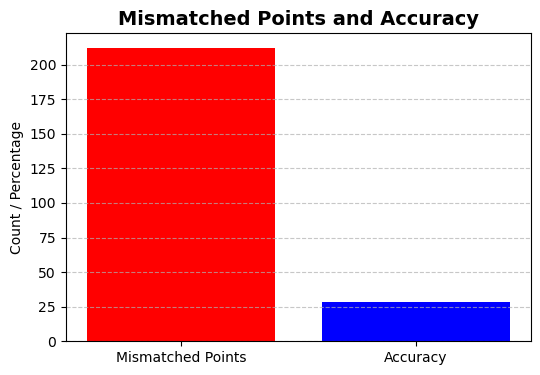

In [250]:
# Define the number of test samples
n_test = 1500

# Prepare data by normalizing images and selecting the first n_test samples
data = digits.images[:n_test] / np.max(digits.images[:])

# Define the number of clusters and epochs
num_clusters = 10
epochs = 200

# Train the model using the prepared data
trained_means, trained_proportions = train_model(data, num_clusters, epochs)

# Prepare the remaining test data for evaluation
Test_images = digits.images[1501:]
actual_labels = digits.target[1501:]

# Define the expected labels for each cluster
expected_labels = [5, 0, 7, 6, 9, 8, 3, 2, 1, 4]

# Initialize variables to track mismatched points and total points
mismatched_points = 0
total_points = len(Test_images)

# Iterate over each test point
for i in range(total_points):
    # Initialize variables to find the closest cluster
    min_distance = 1e9
    min_index = 0
    
    # Iterate over each cluster
    for j in range(10):
        # Calculate the distance between the test point and the cluster mean
        distance = np.linalg.norm(Test_images[i] - trained_means[j].reshape(8, 8))
        
        # Update minimum distance and index if a closer cluster is found
        if distance < min_distance:
            min_distance = distance
            min_index = j
    
    # Check if the assigned cluster label matches the actual label
    if expected_labels[min_index] != actual_labels[i]:
        # Increment mismatched points count if there's a mismatch
        mismatched_points += 1

# Calculate accuracy
accuracy = ((total_points - mismatched_points) * 100) / total_points

# Print the number of mismatched points and accuracy
print("Number of mismatched points: ", mismatched_points)
print("Accuracy: ", accuracy)

# Plot the number of mismatched points and accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Mismatched Points", "Accuracy"], [mismatched_points, accuracy], color=['red', 'blue'])
plt.title("Mismatched Points and Accuracy", fontsize=14, fontweight='bold')
plt.ylabel("Count / Percentage")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Thank you**
